In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#import plotly.express as px


# UK House Index

In [2]:
df_index = pd.read_csv('./data/ukhpi-property-type-camden-from-2001-01-01-to-2020-01-01.csv')

In [3]:
df_index.head()

,Name,URI,Region GSS code,Period,Sales volume,Reporting period,House price index All property types,Average price All property types,Percentage change (monthly) All property types,Percentage change (yearly) All property types,...,Percentage change (yearly) Semi-detached houses,House price index Terraced houses,Average price Terraced houses,Percentage change (monthly) Terraced houses,Percentage change (yearly) Terraced houses,House price index Flats and maisonettes,Average price Flats and maisonettes,Percentage change (monthly) Flats and maisonettes,Percentage change (yearly) Flats and maisonettes,Pivotable date
0,Camden,http://landregistry.data.gov.uk/id/region/camden,E09000007,2001-01,275,monthly,34.49,265515,4.94,21.96,...,20.44,31.37,370569,5.05,19.85,35.04,243460,4.98,22.29,2001-01-01
1,Camden,http://landregistry.data.gov.uk/id/region/camden,E09000007,2001-02,210,monthly,34.79,267786,0.86,17.37,...,16.48,31.71,374690,1.11,15.78,35.33,245501,0.84,17.61,2001-02-01
2,Camden,http://landregistry.data.gov.uk/id/region/camden,E09000007,2001-03,263,monthly,35.47,273059,1.97,18.44,...,16.89,32.48,383785,2.43,16.64,36.00,250145,1.89,18.84,2001-03-01
3,Camden,http://landregistry.data.gov.uk/id/region/camden,E09000007,2001-04,267,monthly,34.94,268947,-1.51,12.22,...,11.50,32.09,379171,-1.20,11.18,35.44,246279,-1.55,12.45,2001-04-01
4,Camden,http://landregistry.data.gov.uk/id/region/camden,E09000007,2001-05,308,monthly,35.06,269837,0.33,8.45,...,7.08,32.25,380984,0.48,7.51,35.57,247145,0.35,8.72,2001-05-01


In [4]:
df_index = df_index.loc[:, ~df_index.columns.str.startswith('Percentage')]
df_index = df_index.loc[:, ~df_index.columns.str.startswith('House ')]
df_index['date'] = pd.to_datetime(df_index['Pivotable date'])
df_index = df_index.drop(columns=['Name','URI', 'Region GSS code', 'Period', 'Reporting period', 'Pivotable date'])

In [5]:
df_index.head()

,Sales volume,Average price All property types,Average price Detached houses,Average price Semi-detached houses,Average price Terraced houses,Average price Flats and maisonettes,date
0,275,265515,896973,566462,370569,243460,2001-01-01
1,210,267786,897527,571990,374690,245501,2001-02-01
2,263,273059,915920,585060,383785,250145,2001-03-01
3,267,268947,900515,576315,379171,246279,2001-04-01
4,308,269837,897269,575948,380984,247145,2001-05-01


In [6]:
df_index = df_index.rename(columns={
        df_index.columns[1]: 'All',
        df_index.columns[2]: 'Detached',
        df_index.columns[3]: 'Semi-Detached',
        df_index.columns[4]: 'Terraced',
        df_index.columns[5]: 'Flat'})

In [7]:
df_index.head()


,Sales volume,All,Detached,Semi-Detached,Terraced,Flat,date
0,275,265515,896973,566462,370569,243460,2001-01-01
1,210,267786,897527,571990,374690,245501,2001-02-01
2,263,273059,915920,585060,383785,250145,2001-03-01
3,267,268947,900515,576315,379171,246279,2001-04-01
4,308,269837,897269,575948,380984,247145,2001-05-01


/Users/charliewright/miniconda3/envs/diss/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/charliewright/miniconda3/envs/diss/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/charliewright/miniconda3/envs/diss/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/charliewright/miniconda3/envs/diss/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as

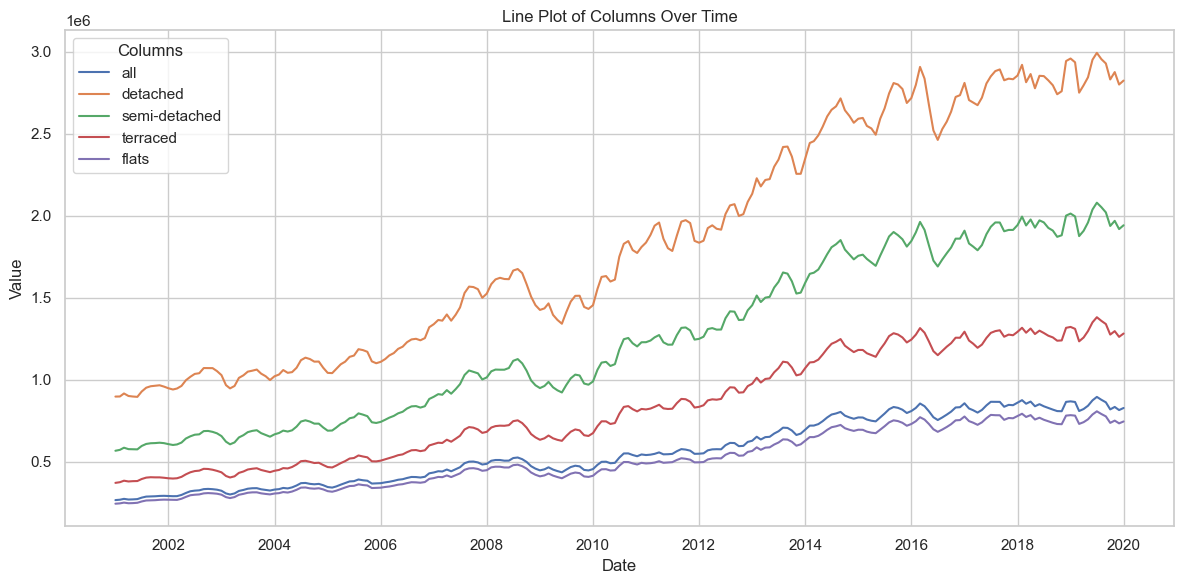

In [8]:
# Set up the Seaborn plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot the columns using lineplot
sns.lineplot(data=df_index, x='date', y='All', label='all')
sns.lineplot(data=df_index, x='date', y='Detached', label='detached')
sns.lineplot(data=df_index, x='date', y='Semi-Detached', label='semi-detached')
sns.lineplot(data=df_index, x='date', y='Terraced', label='terraced')
sns.lineplot(data=df_index, x='date', y='Flat', label='flats')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Line Plot of Columns Over Time')
plt.legend(title='Columns')

# Show the plot
plt.tight_layout()
plt.show()

# Price Paid Index

In [9]:
df_ppd = pd.read_csv('./data/ppd_data_all.csv')

In [10]:
df_ppd = pd.concat([df_ppd.columns.to_frame().T, df_ppd], ignore_index=True)

In [11]:
# rename the columns
df_ppd = df_ppd.rename(columns={df_ppd.columns[0]: 'ppd_id', 
                                df_ppd.columns[1]: 'price',
                                df_ppd.columns[2]: 'date', 
                                df_ppd.columns[3]: 'post code', 
                                df_ppd.columns[11]: 'town',
                                df_ppd.columns[12]: 'locality',
                                'F': 'property_type', 
                                'N':'new_build', 
                                'L': 'estate_type'})

# drop unnecessary columns
df_ppd = df_ppd.drop(columns=['FLAT 19','FARRINGDON ROAD', 'LONDON', 'GREATER LONDON', 'http://landregistry.data.gov.uk/data/ppi/transaction/8455B44E-DF75-4E02-A631-2301B395594E/current', '25', 'ppd_id', 'A', 'town', 'locality'])

# change property type values
property_type_mapping = {
    'D': 'Detached',
    'S': 'Semi-Detached',
    'T': 'Terraced',
    'F': 'Flat',
    'O': 'Other'
}

# Replace the values in the 'property_type' column
df_ppd['property_type'] = df_ppd['property_type'].replace(property_type_mapping)

# change property type
df_ppd['estate_type'] = df_ppd['estate_type'].replace({'L': 'leasehold', 'F': 'freehold'})

# turn price into int
df_ppd['price'] = pd.to_numeric(df_ppd['price'], errors='coerce')

# drop NaN post codes
#df_ppd = df_ppd.dropna()

# get post code prefix
df_ppd['post_code_prefix'] = df_ppd['post code'].str.split().str[0]

# convert date to datetime
df_ppd['date'] = pd.to_datetime(df_ppd['date'], errors='coerce')
df_ppd['year'] = df_ppd['date'].dt.year
df_ppd['month'] = df_ppd['date'].dt.month

### Scatter Plots

In [12]:
df_ppd_2 = df_ppd.dropna()
df_ppd_2 = df_ppd_2[~df_ppd_2['post_code_prefix'].isin(['WC2A','W1P', 'W1D', 'NW10', 'NW9','N1'])]
df_ppd_2['log_price'] = np.log1p(df_ppd_2['price'])

In [14]:
df_ppd_2[df_ppd_2['post_code_prefix'] == prefix]

,price,date,post code,property_type,new_build,estate_type,post_code_prefix,year,month,log_price
0,443000,2003-05-22,EC1M 3HA,Flat,N,leasehold,EC1M,2003,5,13.001327
1,265000,2005-10-07,EC1M 3HA,Flat,N,leasehold,EC1M,2005,10,12.487489
2,250000,2004-04-02,EC1M 3HA,Flat,N,leasehold,EC1M,2004,4,12.429220
3,562500,2010-07-30,EC1M 3HA,Flat,N,leasehold,EC1M,2010,7,13.240148
4,500000,2014-09-26,EC1M 3HA,Flat,N,leasehold,EC1M,2014,9,13.122365
...,...,...,...,...,...,...,...,...,...,...
67,575000,2011-05-06,EC1M 3LL,Flat,N,leasehold,EC1M,2011,5,13.262127
68,124997,2002-09-11,EC1M 3LL,Flat,N,leasehold,EC1M,2002,9,11.736053
69,800000,2003-09-29,EC1M 3LL,Flat,N,leasehold,EC1M,2003,9,13.592368
70,49000,2017-06-12,EC1M 3LL,Other,N,leasehold,EC1M,2017,6,10.799596


# ML Clustering the areas

In [15]:
# using df_ppd_2
df_ppd_2.head()

,price,date,post code,property_type,new_build,estate_type,post_code_prefix,year,month,log_price
0,443000,2003-05-22,EC1M 3HA,Flat,N,leasehold,EC1M,2003,5,13.001327
1,265000,2005-10-07,EC1M 3HA,Flat,N,leasehold,EC1M,2005,10,12.487489
2,250000,2004-04-02,EC1M 3HA,Flat,N,leasehold,EC1M,2004,4,12.429220
3,562500,2010-07-30,EC1M 3HA,Flat,N,leasehold,EC1M,2010,7,13.240148
4,500000,2014-09-26,EC1M 3HA,Flat,N,leasehold,EC1M,2014,9,13.122365


In [16]:
selected_columns = ['price','post_code_prefix', 'property_type', 'new_build', 'estate_type']
categorical_columns = ['post_code_prefix', 'property_type', 'new_build', 'estate_type']

# Extract the selected columns
X_categorical = df_ppd_2[categorical_columns]

# Apply one-hot encoding to categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')  # You can choose drop='first' to avoid multicollinearity
X_encoded = encoder.fit_transform(X_categorical)

# Combine the encoded features with numerical features
X_numerical = df_ppd_2[['price']]
X = np.hstack((X_numerical, X_encoded))

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Perform PCA with specified components (PCA1 and PCA2)
n_components = 2  # Specify the number of components (2 for 2D)
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_normalized)

# Create a DataFrame for visualization
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])


/Users/charliewright/miniconda3/envs/diss/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


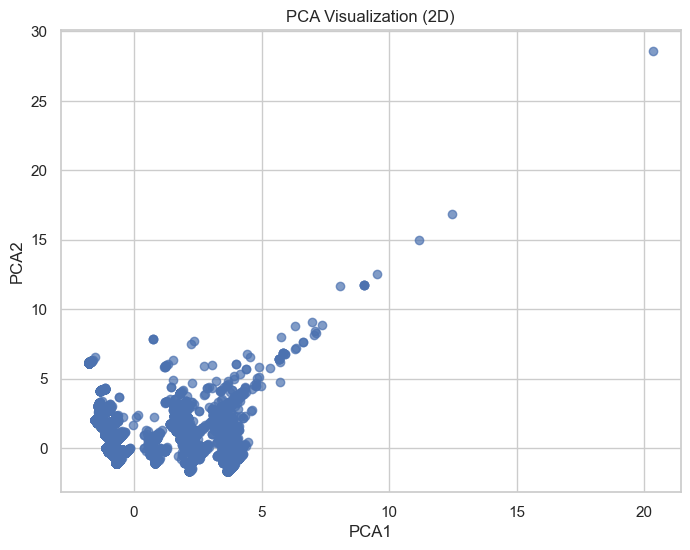

In [17]:
# Visualize the dataset in 2D with PCA1 and PCA2
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], alpha=0.7)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Visualization (2D)')
plt.grid(True)
plt.show()

In [18]:
# Determine the number of components to retain based on explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

In [19]:
# Specify the number of clusters (K)
n_clusters = 3  # Adjust the number of clusters as needed

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Add cluster labels to the PCA DataFrame
df_pca['Cluster'] = cluster_labels

/Users/charliewright/miniconda3/envs/diss/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


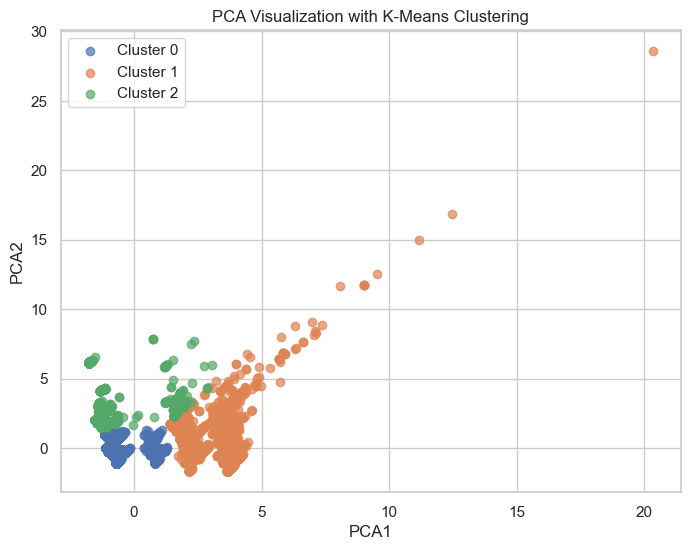

In [20]:
# Visualize the dataset with cluster assignments
plt.figure(figsize=(8, 6))

# Plot data points with different colors for each cluster
for cluster in range(n_clusters):
    plt.scatter(
        df_pca[df_pca['Cluster'] == cluster]['PCA1'],
        df_pca[df_pca['Cluster'] == cluster]['PCA2'],
        label=f'Cluster {cluster}',
        alpha=0.7,
    )

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Visualization with K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
df_ppd_2['Cluster'] = cluster_labels

In [24]:
# Grouped Summary Statistics
cluster_summary = df_ppd_2.groupby('Cluster').agg({
    'price': ['mean', 'median'],
    'post_code_prefix': 'count',  # Count of data points in each cluster
    # Add more columns as needed for analysis
}).reset_index()

# Rename columns for clarity
cluster_summary.columns = ['Cluster', 'Mean_Price', 'Median_Price', 'Count']

In [25]:
df_ppd_2

,price,date,post code,property_type,new_build,estate_type,post_code_prefix,year,month,log_price,Cluster
0,443000,2003-05-22,EC1M 3HA,Flat,N,leasehold,EC1M,2003,5,13.001327,0
1,265000,2005-10-07,EC1M 3HA,Flat,N,leasehold,EC1M,2005,10,12.487489,0
2,250000,2004-04-02,EC1M 3HA,Flat,N,leasehold,EC1M,2004,4,12.429220,0
3,562500,2010-07-30,EC1M 3HA,Flat,N,leasehold,EC1M,2010,7,13.240148,0
4,500000,2014-09-26,EC1M 3HA,Flat,N,leasehold,EC1M,2014,9,13.122365,0
...,...,...,...,...,...,...,...,...,...,...,...
57412,320000,2002-12-06,WC2H 9RJ,Flat,N,leasehold,WC2H,2002,12,12.676079,0
57413,400000,2007-08-24,WC2H 9RZ,Flat,N,leasehold,WC2H,2007,8,12.899222,0
57414,350000,2006-08-21,WC2H 9RZ,Flat,N,leasehold,WC2H,2006,8,12.765691,0
57415,600000,2010-03-16,WC2H 9RZ,Flat,N,leasehold,WC2H,2010,3,13.304687,0


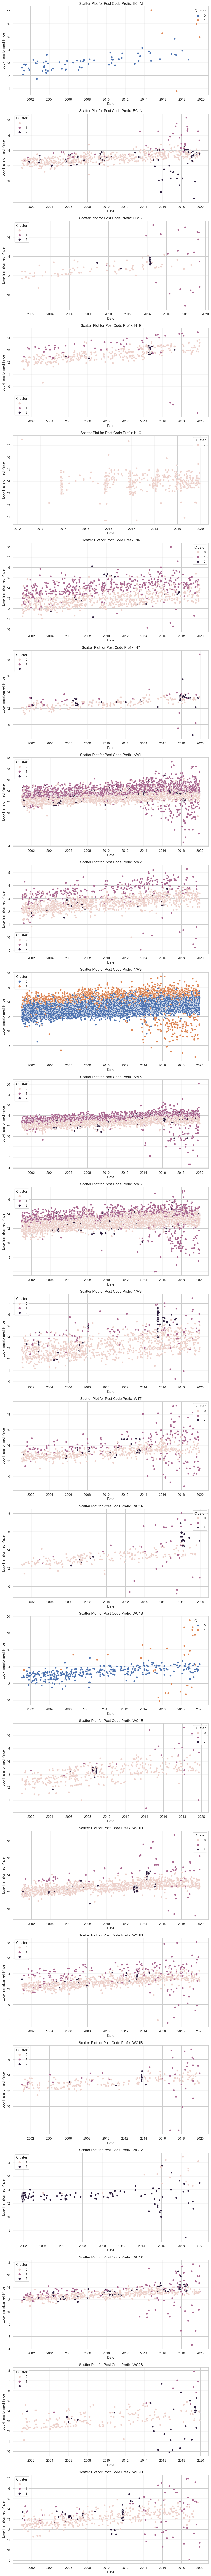

In [26]:
# Get unique post code prefixes
unique_prefixes = df_ppd_2['post_code_prefix'].unique()

# Set up subplots
fig, axs = plt.subplots(len(unique_prefixes), figsize=(10, 5 * len(unique_prefixes)))

# Iterate through unique prefixes and create scatter plots using Seaborn with log-scaled 'price'
for i, prefix in enumerate(unique_prefixes):
    subset = df_ppd_2[df_ppd_2['post_code_prefix'] == prefix]
    sns.scatterplot(data=subset, x='date', y='log_price', ax=axs[i], hue='Cluster')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Log-Transformed Price')
    axs[i].set_title(f'Scatter Plot for Post Code Prefix: {prefix}')

plt.tight_layout()
plt.show()

## Analysis on this ML

In [27]:
cluster_summary = df_ppd_2.groupby('Cluster').agg({
    'price': ['mean', 'median'],
    'new_build': lambda x: (x == 'N').sum() / len(x),  # Proportion of old build
    'estate_type': lambda x: (x == 'leasehold').sum() / len(x),  # Proportion of leasehold
    'property_type': pd.Series.mode,  # Most common property type
    # Add more columns as needed for analysis
}).reset_index()

# Rename columns for clarity
cluster_summary.columns = ['Cluster', 'Mean_Price', 'Median_Price', 'Proportion_Old_Build', 'Proportion_Leasehold', 'Most_Common_Property_Type']


In [29]:
print(cluster_summary)

   Cluster    Mean_Price  Median_Price  Proportion_Old_Build  \
0        0  5.041090e+05      390000.0              0.982967   
1        1  2.280084e+06      975000.0              0.989962   
2        2  8.753853e+05      600000.0              0.060598   

   Proportion_Leasehold Most_Common_Property_Type  
0              0.988507                      Flat  
1              0.123380                  Terraced  
2              0.999170                      Flat  


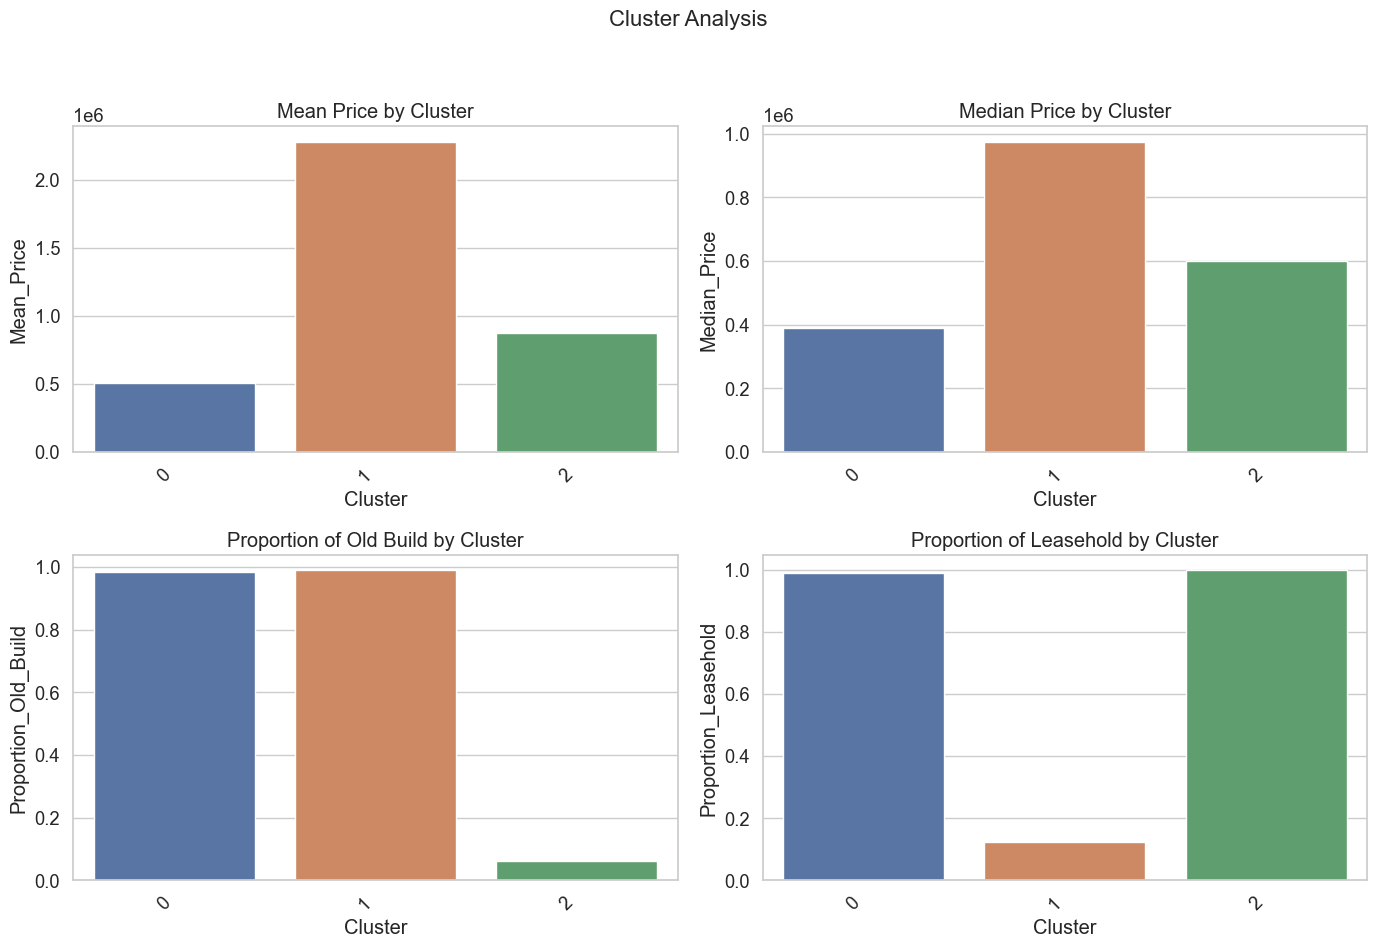

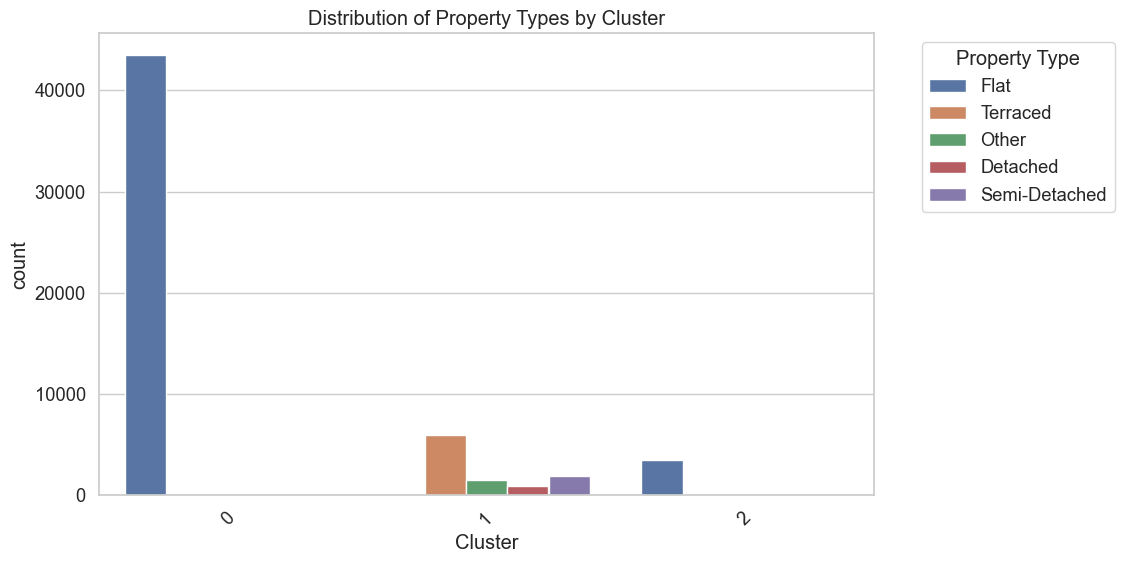

In [30]:
# Set style and context for Seaborn plots
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create subplots for visualization
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Cluster Analysis', fontsize=16)

# Plot Mean and Median Prices
sns.barplot(x='Cluster', y='Mean_Price', data=cluster_summary, ax=axes[0, 0])
axes[0, 0].set_title('Mean Price by Cluster')
sns.barplot(x='Cluster', y='Median_Price', data=cluster_summary, ax=axes[0, 1])
axes[0, 1].set_title('Median Price by Cluster')

# Plot Proportion of New Build to Old Build
sns.barplot(x='Cluster', y='Proportion_Old_Build', data=cluster_summary, ax=axes[1, 0])
axes[1, 0].set_title('Proportion of Old Build by Cluster')

# Plot Proportion of Leasehold to Freehold
sns.barplot(x='Cluster', y='Proportion_Leasehold', data=cluster_summary, ax=axes[1, 1])
axes[1, 1].set_title('Proportion of Leasehold by Cluster')

# Rotate x-axis labels for better readability
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

# Plot Distribution of Property Types in Each Cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=df_ppd_2, x='Cluster', hue='property_type')
plt.title('Distribution of Property Types by Cluster')
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# ML Predicting Property type

In [31]:
df_index['year'] = df_index['date'].dt.year
df_index['month'] = df_index['date'].dt.month
df_index_prep = df_index.drop(columns=['Sales volume', 'All', 'date'])

In [32]:
df_index_prep.head()

,Detached,Semi-Detached,Terraced,Flat,year,month
0,896973,566462,370569,243460,2001,1
1,897527,571990,374690,245501,2001,2
2,915920,585060,383785,250145,2001,3
3,900515,576315,379171,246279,2001,4
4,897269,575948,380984,247145,2001,5


In [33]:
df_ppd = df_ppd[df_ppd['property_type'] != 'Other']
df_ppd_prep = df_ppd.drop(columns=['date', 'post code', 'new_build','estate_type', 'post_code_prefix'])


In [34]:
df_ppd_prep.head()

,price,property_type,year,month
0,443000,Flat,2003,5
1,265000,Flat,2005,10
2,250000,Flat,2004,4
3,562500,Flat,2010,7
4,500000,Flat,2014,9


In [35]:
# Merge dataframes based on 'date'
merged_data = pd.merge(df_index_prep, df_ppd_prep, on=['year','month']).drop_duplicates()

### Feature Engineering for Dataset

In [40]:

# Feature engineering: Calculate price differences
for property_type in ['Flat', 'Detached', 'Semi-Detached', 'Terraced']:
    merged_data[f'price_diff_{property_type}'] = merged_data['price'] - merged_data[property_type]


In [41]:

# Encode 'property_type' column into numerical values
property_type_mapping = {'Flat': 0, 'Detached': 1, 'Semi-Detached': 2, 'Terraced': 3}
merged_data['property_type_encoded'] = merged_data['property_type'].map(property_type_mapping)


In [42]:
merged_data

,Detached,Semi-Detached,Terraced,Flat,year,month,price,property_type,price_diff_Flat,price_diff_Detached,price_diff_Semi-Detached,price_diff_Terraced,property_type_encoded
0,896973,566462,370569,243460,2001,1,119500,Flat,-123960,-777473,-446962,-251069,0
1,896973,566462,370569,243460,2001,1,112000,Flat,-131460,-784973,-454462,-258569,0
2,896973,566462,370569,243460,2001,1,112898,Flat,-130562,-784075,-453564,-257671,0
3,896973,566462,370569,243460,2001,1,308000,Flat,64540,-588973,-258462,-62569,0
4,896973,566462,370569,243460,2001,1,172000,Flat,-71460,-724973,-394462,-198569,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55877,2800422,1918569,1261183,733615,2019,12,1750000,Flat,1016385,-1050422,-168569,488817,0
55878,2800422,1918569,1261183,733615,2019,12,525000,Flat,-208615,-2275422,-1393569,-736183,0
55879,2800422,1918569,1261183,733615,2019,12,840000,Flat,106385,-1960422,-1078569,-421183,0
55880,2800422,1918569,1261183,733615,2019,12,530000,Flat,-203615,-2270422,-1388569,-731183,0


In [44]:
# Split data into features and target
X = merged_data[['price_diff_Flat', 'price_diff_Detached', 'price_diff_Semi-Detached', 'price_diff_Terraced']]
y = merged_data['property_type_encoded']

In [45]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Fit the model

In [46]:
# Choose a machine learning model (Random Forest Classifier in this example)
clf = RandomForestClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

In [47]:
# Convert numerical predictions back to property types
predicted_property_types = [key for key, value in property_type_mapping.items() if value in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7517472474868359


In [48]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


In [50]:
print(conf_matrix)

[[7540   41  116  589]
 [ 108   36   44   53]
 [ 267   37   47  136]
 [1047   46  109  229]]


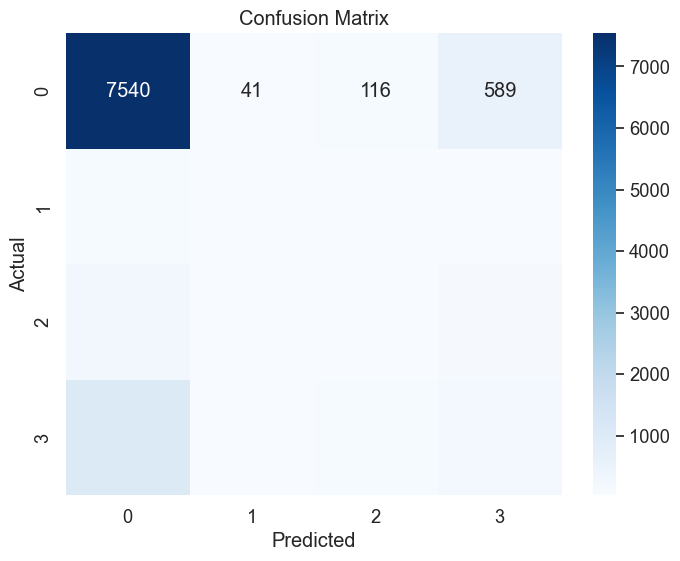

In [49]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Add other variables like crime and houses sold in Camden

In [55]:
df_yearly_camden = pd.read_csv('./data/camden_yearly.csv').drop(columns='Unnamed: 0')

In [56]:
df_yearly_camden

,area,year,no_of_crimes,average_price,houses_sold,median_salary,mean_salary,population_size
0,camden,1999,0.0,191090.666667,3981.0,23677.0,30249.0,190003.0
1,camden,2000,0.0,247114.750000,3477.0,25484.0,34864.0,196174.0
2,camden,2001,46714.0,278593.916667,3590.0,27386.0,40033.0,202567.0
3,camden,2002,48381.0,314179.500000,3851.0,27432.0,34486.0,203972.0
4,camden,2003,46153.0,323053.833333,3150.0,30002.0,38106.0,204254.0
5,camden,2004,41790.0,351847.750000,3760.0,30510.0,38595.0,207341.0
6,camden,2005,38252.0,368345.083333,3319.0,31358.0,39826.0,211088.0
7,camden,2006,39238.0,394819.500000,4156.0,32418.0,40593.0,211032.0
8,camden,2007,36107.0,466485.583333,3630.0,33059.0,40595.0,211520.0
9,camden,2008,32864.0,501223.333333,2052.0,35314.0,42816.0,210273.0


In [57]:
# double check sales
df_index_sales = df_index.groupby(['year'])['Sales volume'].sum().reset_index()

In [58]:
df_ppd = pd.read_csv('./data/ppd_data_all.csv')

In [59]:
df_ppd = pd.concat([df_ppd.columns.to_frame().T, df_ppd], ignore_index=True)

In [60]:
# rename the columns
df_ppd = df_ppd.rename(columns={df_ppd.columns[0]: 'ppd_id', 
                                df_ppd.columns[1]: 'price',
                                df_ppd.columns[2]: 'date', 
                                df_ppd.columns[3]: 'post code', 
                                df_ppd.columns[11]: 'town',
                                df_ppd.columns[12]: 'locality',
                                'F': 'property_type', 
                                'N':'new_build', 
                                'L': 'estate_type'})

# drop unnecessary columns
df_ppd = df_ppd.drop(columns=['FLAT 19','FARRINGDON ROAD', 'LONDON', 'GREATER LONDON', 'http://landregistry.data.gov.uk/data/ppi/transaction/8455B44E-DF75-4E02-A631-2301B395594E/current', '25', 'ppd_id', 'A', 'town', 'locality'])

# change property type values
property_type_mapping = {
    'D': 'Detached',
    'S': 'Semi-Detached',
    'T': 'Terraced',
    'F': 'Flat',
    'O': 'Other'
}

# Replace the values in the 'property_type' column
df_ppd['property_type'] = df_ppd['property_type'].replace(property_type_mapping)

# change property type
df_ppd['estate_type'] = df_ppd['estate_type'].replace({'L': 'leasehold', 'F': 'freehold'})

# turn price into int
df_ppd['price'] = pd.to_numeric(df_ppd['price'], errors='coerce')

# get post code prefix
df_ppd['post_code_prefix'] = df_ppd['post code'].str.split().str[0]

# convert date to datetime
df_ppd['date'] = pd.to_datetime(df_ppd['date'], errors='coerce')
df_ppd['year'] = df_ppd['date'].dt.year
df_ppd['month'] = df_ppd['date'].dt.month

In [61]:
# double check ppd sales
df_ppd_sales = df_ppd.groupby('year').size().reset_index(name='Sales volume')